In [50]:
import pandas as pd
import numpy as np
import holidays
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [ ]:
df = pd.read_excel("data/Project 2_2022.xlsx")
df.Date = pd.to_datetime(df.Date)
df['weekday'] = df.Date.dt.weekday
df["is_payday"] = np.where(abs(df.Balance) > 0.5, 1, 0)
df["was_payday"] = df.is_payday.shift(fill_value=0)
df["is_holiday"] = df.apply(lambda x: x['weekday'] == 5 or x['weekday'] == 6 or x.Date in holidays.country_holidays('RU'), axis=1)

In [ ]:
df

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Динамика временных рядов', fontsize=16)
plt.xlabel('Наблюдение', fontsize=14)
plt.ylabel('Значение', fontsize=14)
# plt.xticks(df.Date)
df.Income.plot(alpha=0.6)
(-df.Outcome).plot()
df.Balance.plot()
plt.legend()
plt.show()

# Neural Network power

In [ ]:
from darts.models import StatsForecastAutoARIMA
from darts.models.forecasting.auto_arima import AutoARIMA

In [ ]:
model = StatsForecastAutoARIMA(start_p=1,
                 d=1,
                 start_q=1,
                 max_p=10,
                 max_d=10,
                 max_q=10,
                 start_P=0,
                 D=1,
                 start_Q=0,
                 max_P=10,
                 max_D=10,
                 max_Q=10,
                max_order=10
                 )

In [ ]:
df["Diff"] = df.Balance.diff().fillna(0)
wts = ts.TimeSeries.from_dataframe(df_no_holidays, value_cols=["Balance"])
train, val = wts[:700], wts[700:]

In [ ]:
model.fit(train)

In [ ]:
pred = model.predict(n=10)

In [ ]:
plt.figure(figsize=(16, 10))
val[:10].plot(label="Val")
pred.plot(label='forecast')

In [ ]:
from darts import timeseries as ts

In [ ]:
train, val, test = wts[:700], wts[700:800], wts[800:]

In [ ]:
model = AutoARIMA(start_p=0,
                 d=0,
                 start_q=0,
                 max_p=10,
                 max_d=10,
                 max_q=10,
                 start_P=0,
                 D=0,
                 start_Q=0,
                 max_P=3,
                 max_D=3,
                 max_Q=3,
                 max_order=5,
                 m=5,
                n_jobs=5)

In [ ]:
model.model_params

In [ ]:
df_no_holidays

In [ ]:
model.fit(train)

In [ ]:
pred = model.predict(n=700)

In [ ]:
plt.figure(figsize=(16, 10))
pred.plot(label='forecast')

In [ ]:
model.gridsearch(train)

In [ ]:
from darts.utils.statistics import check_seasonality, plot_acf, plot_residuals_analysis

In [ ]:
check_seasonality(wts)

In [ ]:
plot_acf(wts)

In [ ]:
plot_residuals_analysis(wts)

In [ ]:
for m in range(2, 25):
    is_seasonal, mseas = check_seasonality(wts, m=m, alpha=0.05)
    if is_seasonal:
        break

print("seasonal? " + str(is_seasonal))
if is_seasonal:
    print('There is seasonality of order {}.'.format(mseas))

In [ ]:
from darts.models import (
    NaiveSeasonal,
    NaiveDrift,
    ExponentialSmoothing,
    ARIMA,
    AutoARIMA,
    Theta
)

In [ ]:
# Импортируем все необходимые нам в работе инструменты

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

from arch.unitroot import PhillipsPerron
from scipy import stats
from sklearn.metrics import r2_score, mean_absolute_percentage_error
from statsmodels.iolib.table import SimpleTable
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller, kpss

%pylab inline

# SARIMA TIME!

In [ ]:
import arch.unitroot a

In [ ]:
def adf_test(timeseries):
    # Выполняем тест Дики-Фуллера:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

# применяем к ряду тест adf
adf_test(df['Balance'].diff().fillna(0))

In [ ]:
# применяем к ряду тест adf
adf_test(df[df['is_holiday'] == False].Balance.diff().fillna(0))

In [ ]:
pp = PhillipsPerron(df[df['is_holiday'] == False].Balance.diff().fillna(0))
print(pp.summary().as_text());

In [ ]:
pp = PhillipsPerron(df.Balance.diff().fillna(0))
print(pp.summary().as_text());

In [ ]:
def kpss_test(series, **kw):
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

kpss_test(df.Balance.diff().fillna(0));

In [ ]:
df[df['is_holiday'] == False].Balance.diff()

In [ ]:
def kpss_test(series, **kw):
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

kpss_test(df[df['is_holiday'] == False].Balance);

In [ ]:
for lag in [10, 15, 25, 30]:
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(211)
    fig = sm.graphics.tsa.plot_acf(df[df['is_holiday'] == False].Balance, lags=lag, ax=ax1) #otg1diff.values.squeeze()
    ax2 = fig.add_subplot(212)
    fig = sm.graphics.tsa.plot_pacf(df[df['is_holiday'] == False].Balance, lags=lag, ax=ax2)
    plt.show()

In [ ]:
for lag in [10, 15, 25, 30]:
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(211)
    fig = sm.graphics.tsa.plot_acf(df[df['is_holiday'] == False].Balance, lags=lag, ax=ax1) #otg1diff.values.squeeze()
    ax2 = fig.add_subplot(212)
    fig = sm.graphics.tsa.plot_pacf(df[df['is_holiday'] == False].Balance, lags=lag, ax=ax2)
    plt.show()

In [ ]:
mod = smf.ols('Diff ~ float', data=df[['Date', 'Diff']])
res = mod.fit()
print(res.summary())

beginningtex = """\\documentclass{report}
\\usepackage{booktabs}
\\begin{document}"""
endtex = "\end{document}"

f = open('myreg.tex', 'w')
f.write(beginningtex)
f.write(res.summary().as_latex())
f.write(endtex)
f.close()

In [ ]:
# Импортируем все необходимые нам в работе инструменты

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

from arch.unitroot import PhillipsPerron
from scipy import stats
from sklearn.metrics import r2_score, mean_absolute_percentage_error
from statsmodels.iolib.table import SimpleTable
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller, kpss

%pylab inline

In [ ]:
def arima(data, p, d, q, models=[]):
    '''
    Оценка ARIMA модели с параметрами p, d, q.
    '''
    ARMA = ARIMA(data, order=(p, d, q)).fit()
    ARMA.predict()
    models.append(ARMA)
    print()
    print(f'Оценка модели с параметрами p = {p}, d = {d}, q = {q}')
    print()
    print(ARMA.summary())

In [ ]:
arima(df_no_holidays.Balance, 1, 0, 0)

In [ ]:
arima(df_no_holidays.Balance[:500], 1, 1, 0)

In [ ]:
df_no_holidays = df[df["is_holiday"] == False]
model = ARIMA(df_no_holidays.Balance, exog=df_no_holidays[["is_payday", "was_payday"]].values,order=(2, 1, 1), seasonal_order=(2, 0, 1, 5)).fit()
model.predict()
print(model.summary())

In [ ]:
plt.figure(figsize=(16, 10))
plt.title("Was payday")
model.predict().plot(label="predict")
df_no_holidays.Balance.plot(label="gt", alpha=0.5)
plt.legend()
plt.show()

In [ ]:
# df_no_holidays = df[df["is_holiday"] == False]
# model = ARIMA(df_no_holidays.Balance, exog=df_no_holidays.is_payday,order=(2, 1, 1), seasonal_order=(2, 0, 1, 5)).fit()
# model.predict()
# print(model.summary())

In [ ]:
plt.figure(figsize=(16, 10))
plt.title("Is payday")
model.predict().plot(label="predict")
df_no_holidays.Balance.plot(label="gt", alpha=0.5)
plt.legend()
plt.show()

In [ ]:
def check_model(params):
    model = ARIMA(df_no_holidays.Balance, order=params["order"], seasonal_order=params["seas"]).fit()
    model.predict()
    return model.aic

In [ ]:
params = []
for p in range(1, 4):
    for d in range(0, 4):
        for q in range(0, 4):
            for ps in range(0, 4):
                for ds in range(0, 4):
                    for qs in range(0, 4):
                        if ps != 0 and qs !=0 and ds!=0:
                            params.append({"order": (p, d, q), "seas":(ps, ds, qs, 5)})

In [ ]:
aics = []
from tqdm.notebook import tqdm
for param in tqdm(params):
    aics.append(check_model(param))

In [ ]:
len(params)

In [ ]:
params[62]

In [317]:
model.gridsearch(train)

TypeError: ForecastingModel.gridsearch() missing 1 required positional argument: 'series'

In [318]:
from darts.utils.statistics import check_seasonality, plot_acf, plot_residuals_analysis

In [321]:
check_seasonality(wts)

(True, 5)

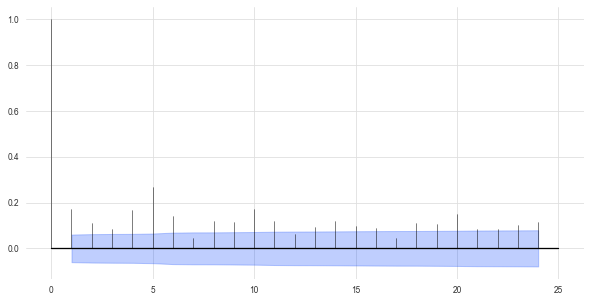

In [323]:
plot_acf(wts)

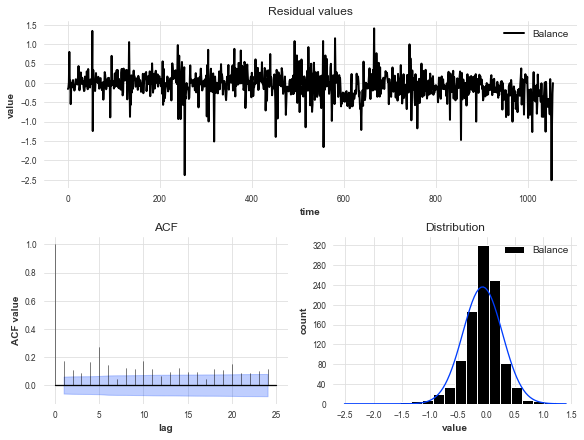

In [324]:
plot_residuals_analysis(wts)

In [325]:
for m in range(2, 25):
    is_seasonal, mseas = check_seasonality(wts, m=m, alpha=0.05)
    if is_seasonal:
        break

print("seasonal? " + str(is_seasonal))
if is_seasonal:
    print('There is seasonality of order {}.'.format(mseas))

seasonal? True
There is seasonality of order 5.


In [329]:
from darts.models import (
    NaiveSeasonal,
    NaiveDrift,
    ExponentialSmoothing,
    ARIMA,
    AutoARIMA,
    Theta
)

ImportError: cannot import name 'AutoARIMA' from 'darts.models' (/Users/takkat14/opt/anaconda3/envs/TimeSeries/lib/python3.10/site-packages/darts/models/__init__.py)

In [86]:
# Импортируем все необходимые нам в работе инструменты

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

from arch.unitroot import PhillipsPerron
from scipy import stats
from sklearn.metrics import r2_score, mean_absolute_percentage_error
from statsmodels.iolib.table import SimpleTable
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller, kpss

%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# SARIMA TIME!

In [85]:
import arch.unitroot a

In [235]:
def adf_test(timeseries):
    # Выполняем тест Дики-Фуллера:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

# применяем к ряду тест adf
adf_test(df['Balance'].diff().fillna(0))

Results of Dickey-Fuller Test:
Test Statistic                -1.477228e+01
p-value                        2.312580e-27
#Lags Used                     1.900000e+01
Number of Observations Used    1.523000e+03
Critical Value (1%)           -3.434651e+00
Critical Value (5%)           -2.863440e+00
Critical Value (10%)          -2.567781e+00
dtype: float64


In [247]:
# применяем к ряду тест adf
adf_test(df[df['is_holiday'] == False].Balance.diff().fillna(0))

Results of Dickey-Fuller Test:
Test Statistic                -1.230422e+01
p-value                        7.333464e-23
#Lags Used                     1.800000e+01
Number of Observations Used    1.037000e+03
Critical Value (1%)           -3.436672e+00
Critical Value (5%)           -2.864331e+00
Critical Value (10%)          -2.568256e+00
dtype: float64


In [248]:
pp = PhillipsPerron(df[df['is_holiday'] == False].Balance.diff().fillna(0))
print(pp.summary().as_text());

     Phillips-Perron Test (Z-tau)    
Test Statistic               -144.486
P-value                         0.000
Lags                               22
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [236]:
pp = PhillipsPerron(df.Balance.diff().fillna(0))
print(pp.summary().as_text());

     Phillips-Perron Test (Z-tau)    
Test Statistic               -178.778
P-value                         0.000
Lags                               24
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [237]:
def kpss_test(series, **kw):
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

kpss_test(df.Balance.diff().fillna(0));

KPSS Statistic: 0.045661598185854295
p-value: 0.1
num lags: 126
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


/Users/takkat14/opt/anaconda3/envs/TimeSeries/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [103]:
df[df['is_holiday'] == False].Balance.diff()

0            NaN
1       0.030332
2       0.133339
3       0.792624
4      -0.820112
          ...   
1536   -0.282032
1537   -1.645077
1540    1.497207
1541    0.757993
1542    0.254809
Name: Balance, Length: 1056, dtype: float64

In [250]:
def kpss_test(series, **kw):
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

kpss_test(df[df['is_holiday'] == False].Balance);

KPSS Statistic: 2.626279611743671
p-value: 0.01
num lags: 13
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


/Users/takkat14/opt/anaconda3/envs/TimeSeries/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


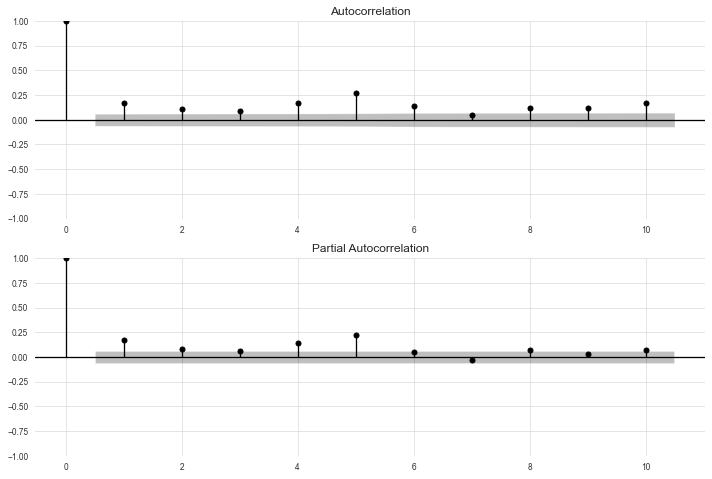

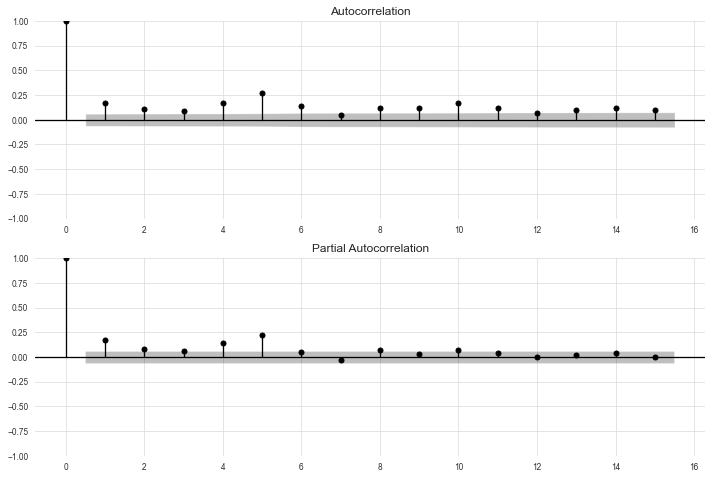

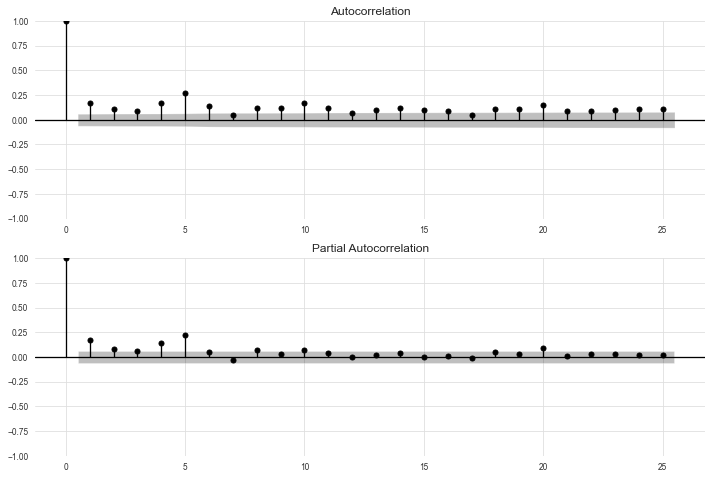

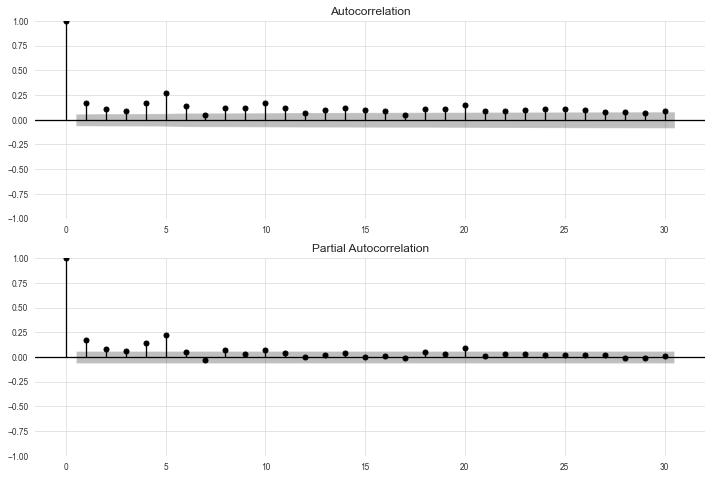

In [252]:
for lag in [10, 15, 25, 30]:
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(211)
    fig = sm.graphics.tsa.plot_acf(df[df['is_holiday'] == False].Balance, lags=lag, ax=ax1) #otg1diff.values.squeeze()
    ax2 = fig.add_subplot(212)
    fig = sm.graphics.tsa.plot_pacf(df[df['is_holiday'] == False].Balance, lags=lag, ax=ax2)
    plt.show()

In [ ]:
for lag in [10, 15, 25, 30]:
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(211)
    fig = sm.graphics.tsa.plot_acf(df[df['is_holiday'] == False].Balance, lags=lag, ax=ax1) #otg1diff.values.squeeze()
    ax2 = fig.add_subplot(212)
    fig = sm.graphics.tsa.plot_pacf(df[df['is_holiday'] == False].Balance, lags=lag, ax=ax2)
    plt.show()

In [70]:
mod = smf.ols('Diff ~ float', data=df[['Date', 'Diff']])
res = mod.fit()
print(res.summary())

beginningtex = """\\documentclass{report}
\\usepackage{booktabs}
\\begin{document}"""
endtex = "\end{document}"

f = open('myreg.tex', 'w')
f.write(beginningtex)
f.write(res.summary().as_latex())
f.write(endtex)
f.close()

PatsyError: Number of rows mismatch between data argument and float (1543 versus 1)
    Diff ~ float
           ^^^^^

In [364]:
# Импортируем все необходимые нам в работе инструменты

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

from arch.unitroot import PhillipsPerron
from scipy import stats
from sklearn.metrics import r2_score, mean_absolute_percentage_error
from statsmodels.iolib.table import SimpleTable
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller, kpss

%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [365]:
def arima(data, p, d, q, models=[]):
    '''
    Оценка ARIMA модели с параметрами p, d, q.
    '''
    ARMA = ARIMA(data, order=(p, d, q)).fit()
    ARMA.predict()
    models.append(ARMA)
    print()
    print(f'Оценка модели с параметрами p = {p}, d = {d}, q = {q}')
    print()
    print(ARMA.summary())

In [366]:
arima(df_no_holidays.Balance, 1, 0, 0)


Оценка модели с параметрами p = 1, d = 0, q = 0

                               SARIMAX Results                                
Dep. Variable:                Balance   No. Observations:                 1056
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -374.286
Date:                Sun, 22 May 2022   AIC                            754.572
Time:                        19:40:13   BIC                            769.458
Sample:                             0   HQIC                           760.215
                               - 1056                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0701      0.014     -5.186      0.000      -0.097      -0.044
ar.L1          0.1726      0.023      7.624      0.000       0.128       0.217
si

In [367]:
arima(df_no_holidays.Balance[:500], 1, 1, 0)


Оценка модели с параметрами p = 1, d = 1, q = 0

                               SARIMAX Results                                
Dep. Variable:                Balance   No. Observations:                  500
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -245.387
Date:                Sun, 22 May 2022   AIC                            494.774
Time:                        19:40:14   BIC                            503.199
Sample:                             0   HQIC                           498.080
                                - 500                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4746      0.026    -18.452      0.000      -0.525      -0.424
sigma2         0.1565      0.005     32.957      0.000       0.147       0.166
Lj

In [419]:
df_no_holidays = df[df["is_holiday"] == False]
model = ARIMA(df_no_holidays.Balance, exog=df_no_holidays[["is_payday", "was_payday"]].values,order=(2, 1, 1), seasonal_order=(2, 0, 1, 5)).fit()
model.predict()
print(model.summary())

/Users/takkat14/opt/anaconda3/envs/TimeSeries/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/takkat14/opt/anaconda3/envs/TimeSeries/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/takkat14/opt/anaconda3/envs/TimeSeries/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                    SARIMAX Results                                    
Dep. Variable:                         Balance   No. Observations:                 1056
Model:             ARIMA(2, 1, 1)x(2, 0, 1, 5)   Log Likelihood                -280.059
Date:                         Sun, 22 May 2022   AIC                            578.118
Time:                                 20:07:09   BIC                            622.770
Sample:                                      0   HQIC                           595.045
                                        - 1056                                         
Covariance Type:                           opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.2702      0.015    -17.855      0.000      -0.300      -0.241
x2            -0.0385      0.031     -1.235      0.217     

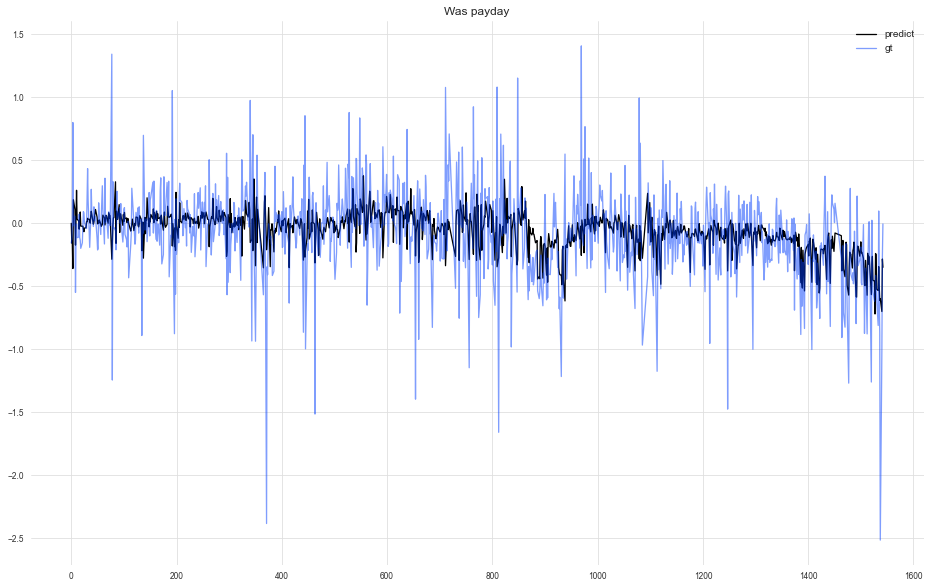

In [420]:
plt.figure(figsize=(16, 10))
plt.title("Was payday")
model.predict().plot(label="predict")
df_no_holidays.Balance.plot(label="gt", alpha=0.5)
plt.legend()
plt.show()

In [421]:
# df_no_holidays = df[df["is_holiday"] == False]
# model = ARIMA(df_no_holidays.Balance, exog=df_no_holidays.is_payday,order=(2, 1, 1), seasonal_order=(2, 0, 1, 5)).fit()
# model.predict()
# print(model.summary())

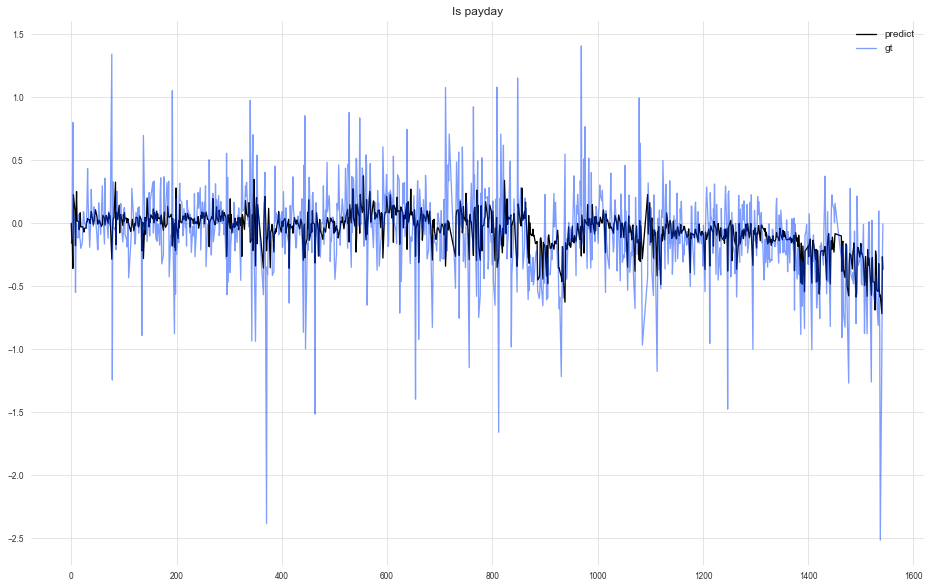

In [417]:
plt.figure(figsize=(16, 10))
plt.title("Is payday")
model.predict().plot(label="predict")
df_no_holidays.Balance.plot(label="gt", alpha=0.5)
plt.legend()
plt.show()

In [372]:
def check_model(params):
    model = ARIMA(df_no_holidays.Balance, order=params["order"], seasonal_order=params["seas"]).fit()
    model.predict()
    return model.aic

In [383]:
params = []
for p in range(1, 4):
    for d in range(0, 4):
        for q in range(0, 4):
            for ps in range(0, 4):
                for ds in range(0, 4):
                    for qs in range(0, 4):
                        if ps != 0 and qs !=0 and ds!=0:
                            params.append({"order": (p, d, q), "seas":(ps, ds, qs, 5)})

In [384]:
aics = []
from tqdm.notebook import tqdm
for param in tqdm(params):
    aics.append(check_model(param))

  0%|          | 0/1296 [00:00<?, ?it/s]

/Users/takkat14/opt/anaconda3/envs/TimeSeries/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/takkat14/opt/anaconda3/envs/TimeSeries/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/takkat14/opt/anaconda3/envs/TimeSeries/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/takkat14/opt/anaconda3/envs/TimeSeries/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as st

/Users/takkat14/opt/anaconda3/envs/TimeSeries/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/takkat14/opt/anaconda3/envs/TimeSeries/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/takkat14/opt/anaconda3/envs/TimeSeries/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/takkat14/opt/anaconda3/envs/TimeSeries/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("

/Users/takkat14/opt/anaconda3/envs/TimeSeries/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/takkat14/opt/anaconda3/envs/TimeSeries/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/takkat14/opt/anaconda3/envs/TimeSeries/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/takkat14/opt/anaconda3/envs/TimeSeries/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. 

KeyboardInterrupt: 

In [378]:
len(params)

4096

In [380]:
params[62]

{'order': (0, 0, 0), 'seas': (3, 3, 2, 5)}